## 1. Setup and Installation

In [1]:
# Install YOLOv8
!pip install ultralytics==8.0.196 -q
print("Installation complete")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 631.1/631.1 kB 26.7 MB/s eta 0:00:00
Installation complete


In [2]:
#import libraries
from ultralytics import YOLO
import os
from IPython.display import Image, display
import torch

print(f"GPU Available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"GPU: {torch.cuda.get_device_name(0)}")

GPU Available: True
GPU: Tesla T4


In [3]:
# Fix PyTorch 2.6 compatibility
import torch

_original_load = torch.load
def _patched_load(*args, **kwargs):
    kwargs['weights_only'] = False
    return _original_load(*args, **kwargs)

torch.load = _patched_load
print("PyTorch compatibility fix applied")

PyTorch compatibility fix applied


## 2. Upload Dataset

**Upload your dataset as a ZIP file** (faster and more reliable than uploading folder)

In [4]:
# Upload ZIP file
from google.colab import files
print("Click 'Choose Files' and select your dataset ZIP")
uploaded = files.upload()

Click 'Choose Files' and select your dataset ZIP


Saving vehicle-dataset.zip to vehicle-dataset.zip


In [5]:
#extract the ZIP
import zipfile

zip_name = list(uploaded.keys())[0]
print(f"Extracting {zip_name}...")

with zipfile.ZipFile(zip_name, 'r') as zip_ref:
    zip_ref.extractall('.')

print("Extraction complete!")
print("\nExtracted contents:")
!ls

Extracting vehicle-dataset.zip...
Extraction complete!

Extracted contents:
sample_data  vehicle-dataset  vehicle-dataset.zip


## 3. Dataset Configuration


In [7]:
# Configuration
DATASET_DIR = "vehicle-dataset"
MODEL = "yolov8s.pt"
EPOCHS = 100
IMAGE_SIZE = 640
BATCH_SIZE = 16

print(f"Dataset: {DATASET_DIR}")
print(f"Model: {MODEL}")
print(f"Epochs: {EPOCHS}")
print(f"Batch: {BATCH_SIZE}")

Dataset: vehicle-dataset
Model: yolov8s.pt
Epochs: 100
Batch: 16


In [8]:
# Fix data.yaml path automatically
import yaml

# Find yaml file
yaml_file = None
if os.path.exists(f"{DATASET_DIR}/data.yaml"):
    yaml_file = f"{DATASET_DIR}/data.yaml"
elif os.path.exists(f"{DATASET_DIR}/data"):
    yaml_file = f"{DATASET_DIR}/data"

if yaml_file:
    # Read yaml
    with open(yaml_file, 'r') as f:
        data = yaml.safe_load(f)

    # Update path
    old_path = data.get('path', '')
    data['path'] = os.path.abspath(DATASET_DIR)

    # Save
    with open(yaml_file, 'w') as f:
        yaml.dump(data, f)

    print(f"Updated {yaml_file}")
    print(f"Old path: {old_path}")
    print(f"New path: {data['path']}")
else:
    print("Warning: No yaml config file found")

Updated vehicle-dataset/data.yaml
Old path: /home/ravindu/DeepVision/datasets/Vehicle data set v5.v1i.yolov8
New path: /content/vehicle-dataset


## 4. Verify Dataset

In [9]:
# Check if dataset exists
if os.path.exists(DATASET_DIR):
    print(f"Found dataset at: {DATASET_DIR}")
    print("\nContents:")
    !ls {DATASET_DIR}
else:
    print(f"ERROR: Dataset not found at {DATASET_DIR}")
    print("Please upload your dataset folder to Colab")

Found dataset at: vehicle-dataset

Contents:
data.yaml  README.dataset.txt  README.roboflow.txt  test  train  valid


In [10]:
# Find the yaml config file
yaml_path = None

if os.path.exists(f"{DATASET_DIR}/data.yaml"):
    yaml_path = f"{DATASET_DIR}/data.yaml"
elif os.path.exists(f"{DATASET_DIR}/data"):
    yaml_path = f"{DATASET_DIR}/data"

if yaml_path:
    print(f"Config file: {yaml_path}")
    print("\nConfig contents:")
    !cat {yaml_path}
else:
    print("ERROR: No data.yaml or data file found")
    print("Your dataset needs a YAML configuration file")

Config file: vehicle-dataset/data.yaml

Config contents:
names:
- bicycle
- bus
- car
- motorcycle
- three_wheeler
- tractor
- truck
- van
nc: 8
path: /content/vehicle-dataset
test: test/images
train: train/images
val: valid/images


## 5. Train the Model

**Note:** Training takes approximately 1-2 hours on T4 GPU

In [11]:
# Load model
model = YOLO(MODEL)
print(f"Loaded {MODEL}")

100%|██████████| 21.5M/21.5M [00:00<00:00, 101MB/s] 


Loaded yolov8s.pt


In [12]:
# Train

results = model.train(
    data=yaml_path,
    epochs=EPOCHS,
    imgsz=IMAGE_SIZE,
    batch=BATCH_SIZE,
    name='vehicle_detector',
    patience=15,
    device=0,  # Use GPU
    plots=True,
    save=True
)

print("\nTraining complete!")

New https://pypi.org/project/ultralytics/8.4.14 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.12.12 torch-2.9.0+cu128 CUDA:0 (Tesla T4, 14913MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=vehicle-dataset/data.yaml, epochs=100, patience=15, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=vehicle_detector, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=F

 3


wandb: You chose "Don't visualize my results"
wandb: Using W&B in offline mode.
wandb: W&B API key is configured. Use `wandb login --relogin` to force relogin


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
100%|██████████| 6.23M/6.23M [00:00<00:00, 110MB/s]
/usr/local/lib/python3.12/dist-packages/ultralytics/utils/checks.py:558: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(True):
AMP: checks passed ✅
/usr/local/lib/python3.12/dist-packages/ultralytics/engine/trainer.py:238: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = amp.GradScaler(enabled=self.amp)
train: Scanning /content/vehicle-dataset/train/labels... 3039 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3039/3039 [00:01<00:00, 2470.47it/s]
train: New cache created: /content/vehicle-dataset/train/labels.cache
/usr/local/lib/python3.12/dist-packages/ultralytics/data/augment.py:805: UserWarning: Argument(s) 'quality_lower

lr/pg0,▆████▇▇▆▆▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▄▄▄▃▃▃▂▂▂▂▂▂▁▁▁
lr/pg1,▆████▇▇▇▇▇▇▆▆▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▃▂▂▂▁
lr/pg2,▃▆█████▇▇▇▆▆▆▆▆▅▅▅▅▄▄▄▃▃▃▃▃▃▃▃▂▂▂▂▂▂▂▁▁▁
metrics/mAP50(B),▁▂▃▃▄▅▅▆▆▆▇▇▇▇▇▆▇▇▇▇▇▇▇▇█████████▇██████
metrics/mAP50-95(B),▁▂▃▅▅▆▆▆▆▆▆▆▇▆▇▇▇▇▇▇▇▇▇▇▇█▇██▇██████████
metrics/precision(B),▁▂▂▄▆▅▄▆▆▆▅▇▆▇▇▆▆▇▇▇█▇▇▇▇█▇█▇▇▇▇▇▇▇██▇▇▇
metrics/recall(B),▁▂▄▃▃▄▄▅▅▅▆▆▆▆▆▇▇▆▆▆▇▇▇▇▆▇▇▇▇▇▇▇▇▇█▇▇▇██
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
+6,...



Training complete!


  ## 6. View Results

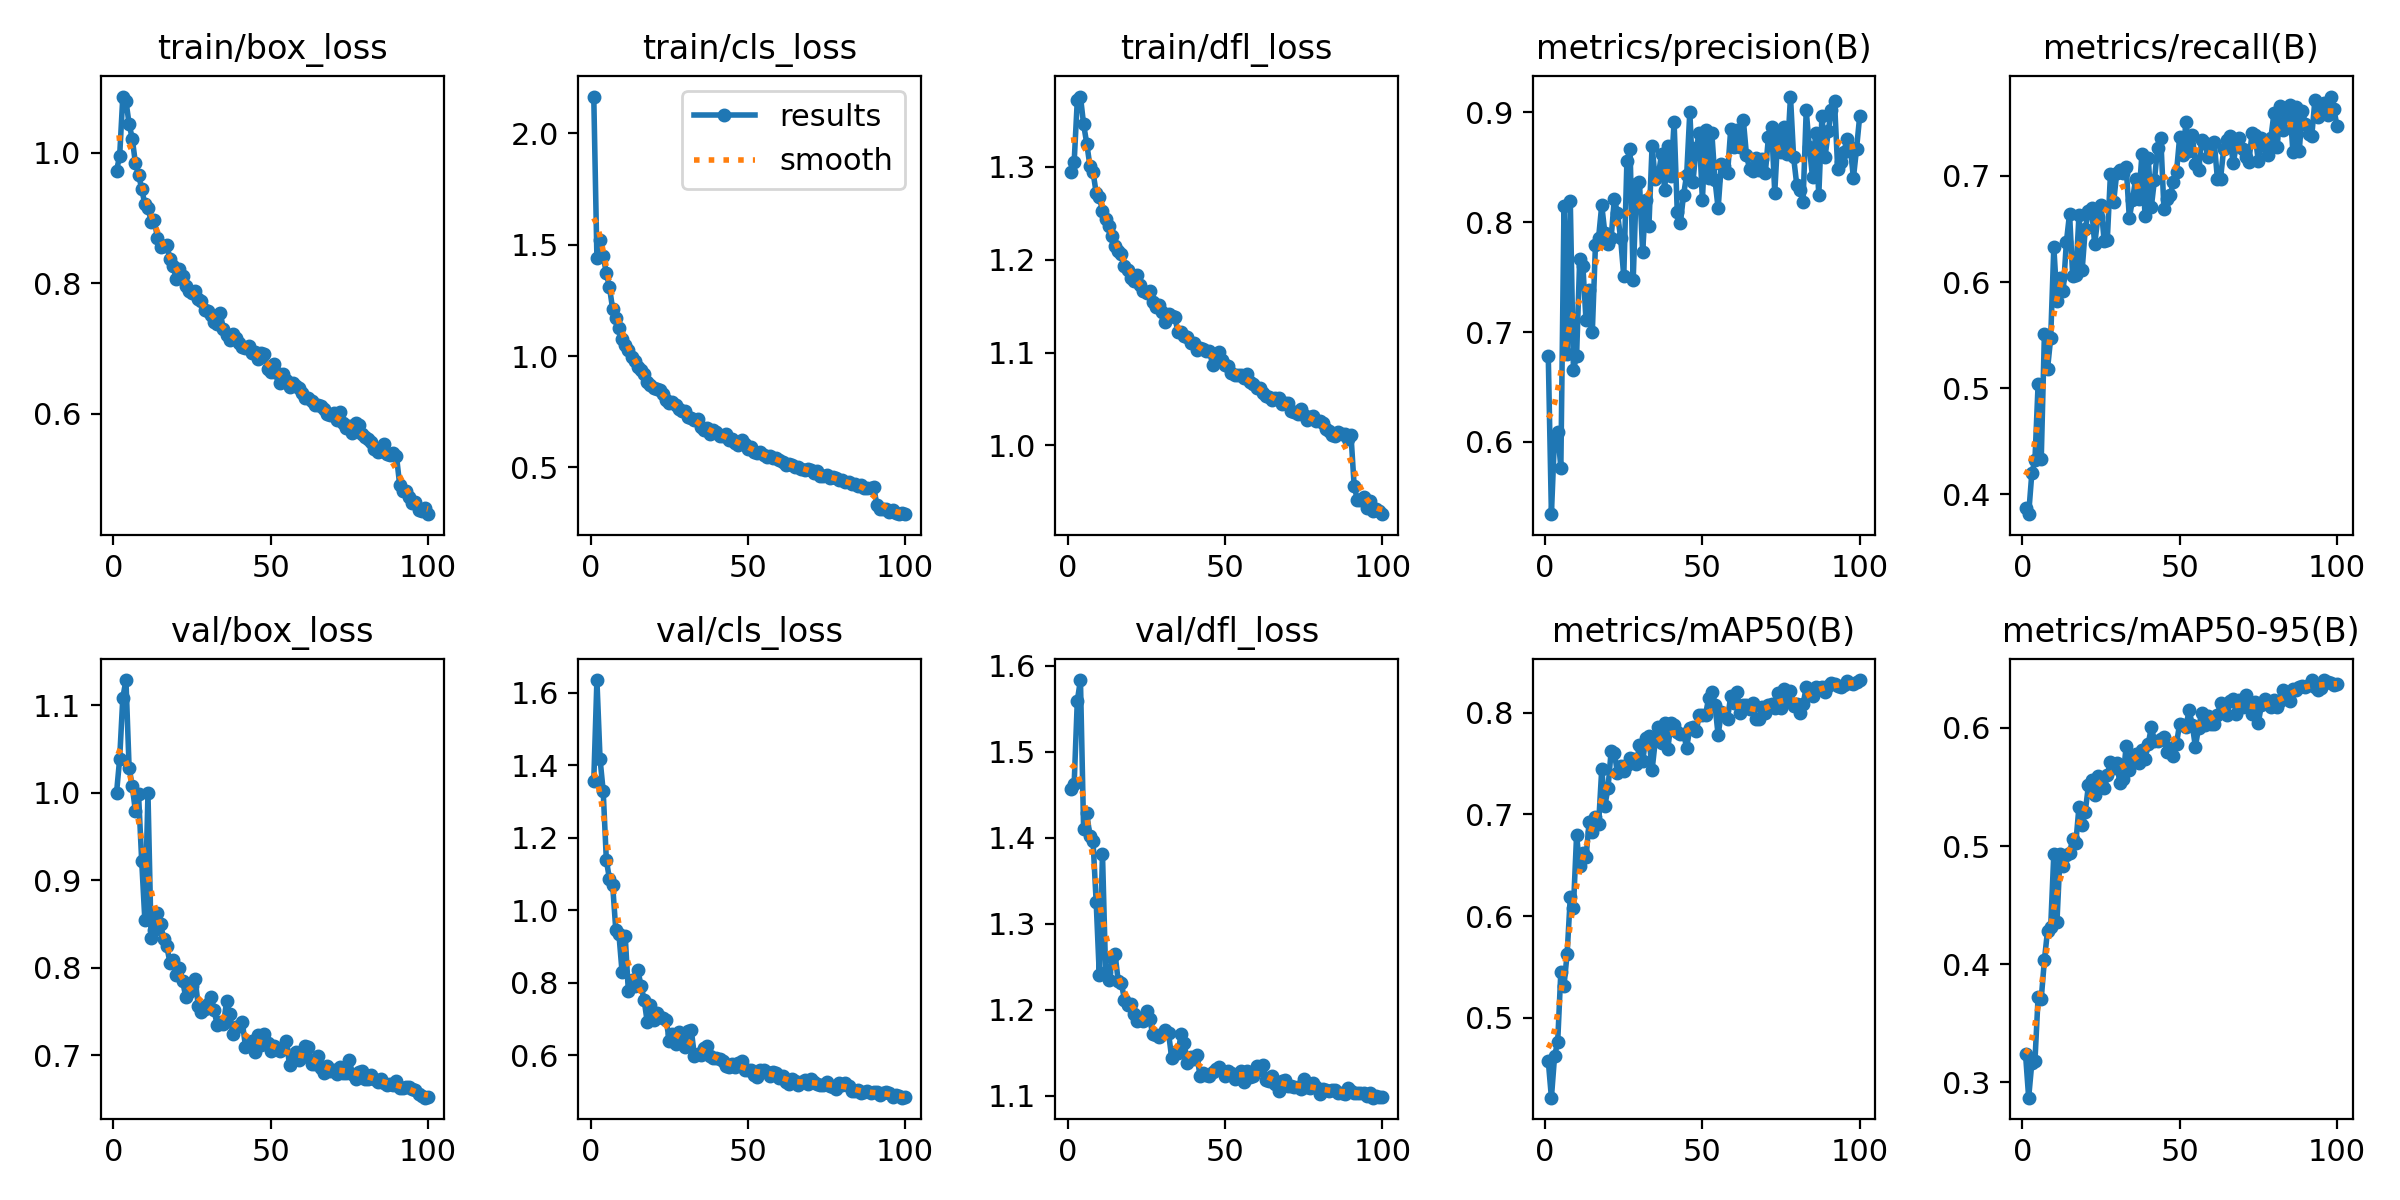

In [13]:
# Training curves
Image(filename='runs/detect/vehicle_detector/results.png', width=900)

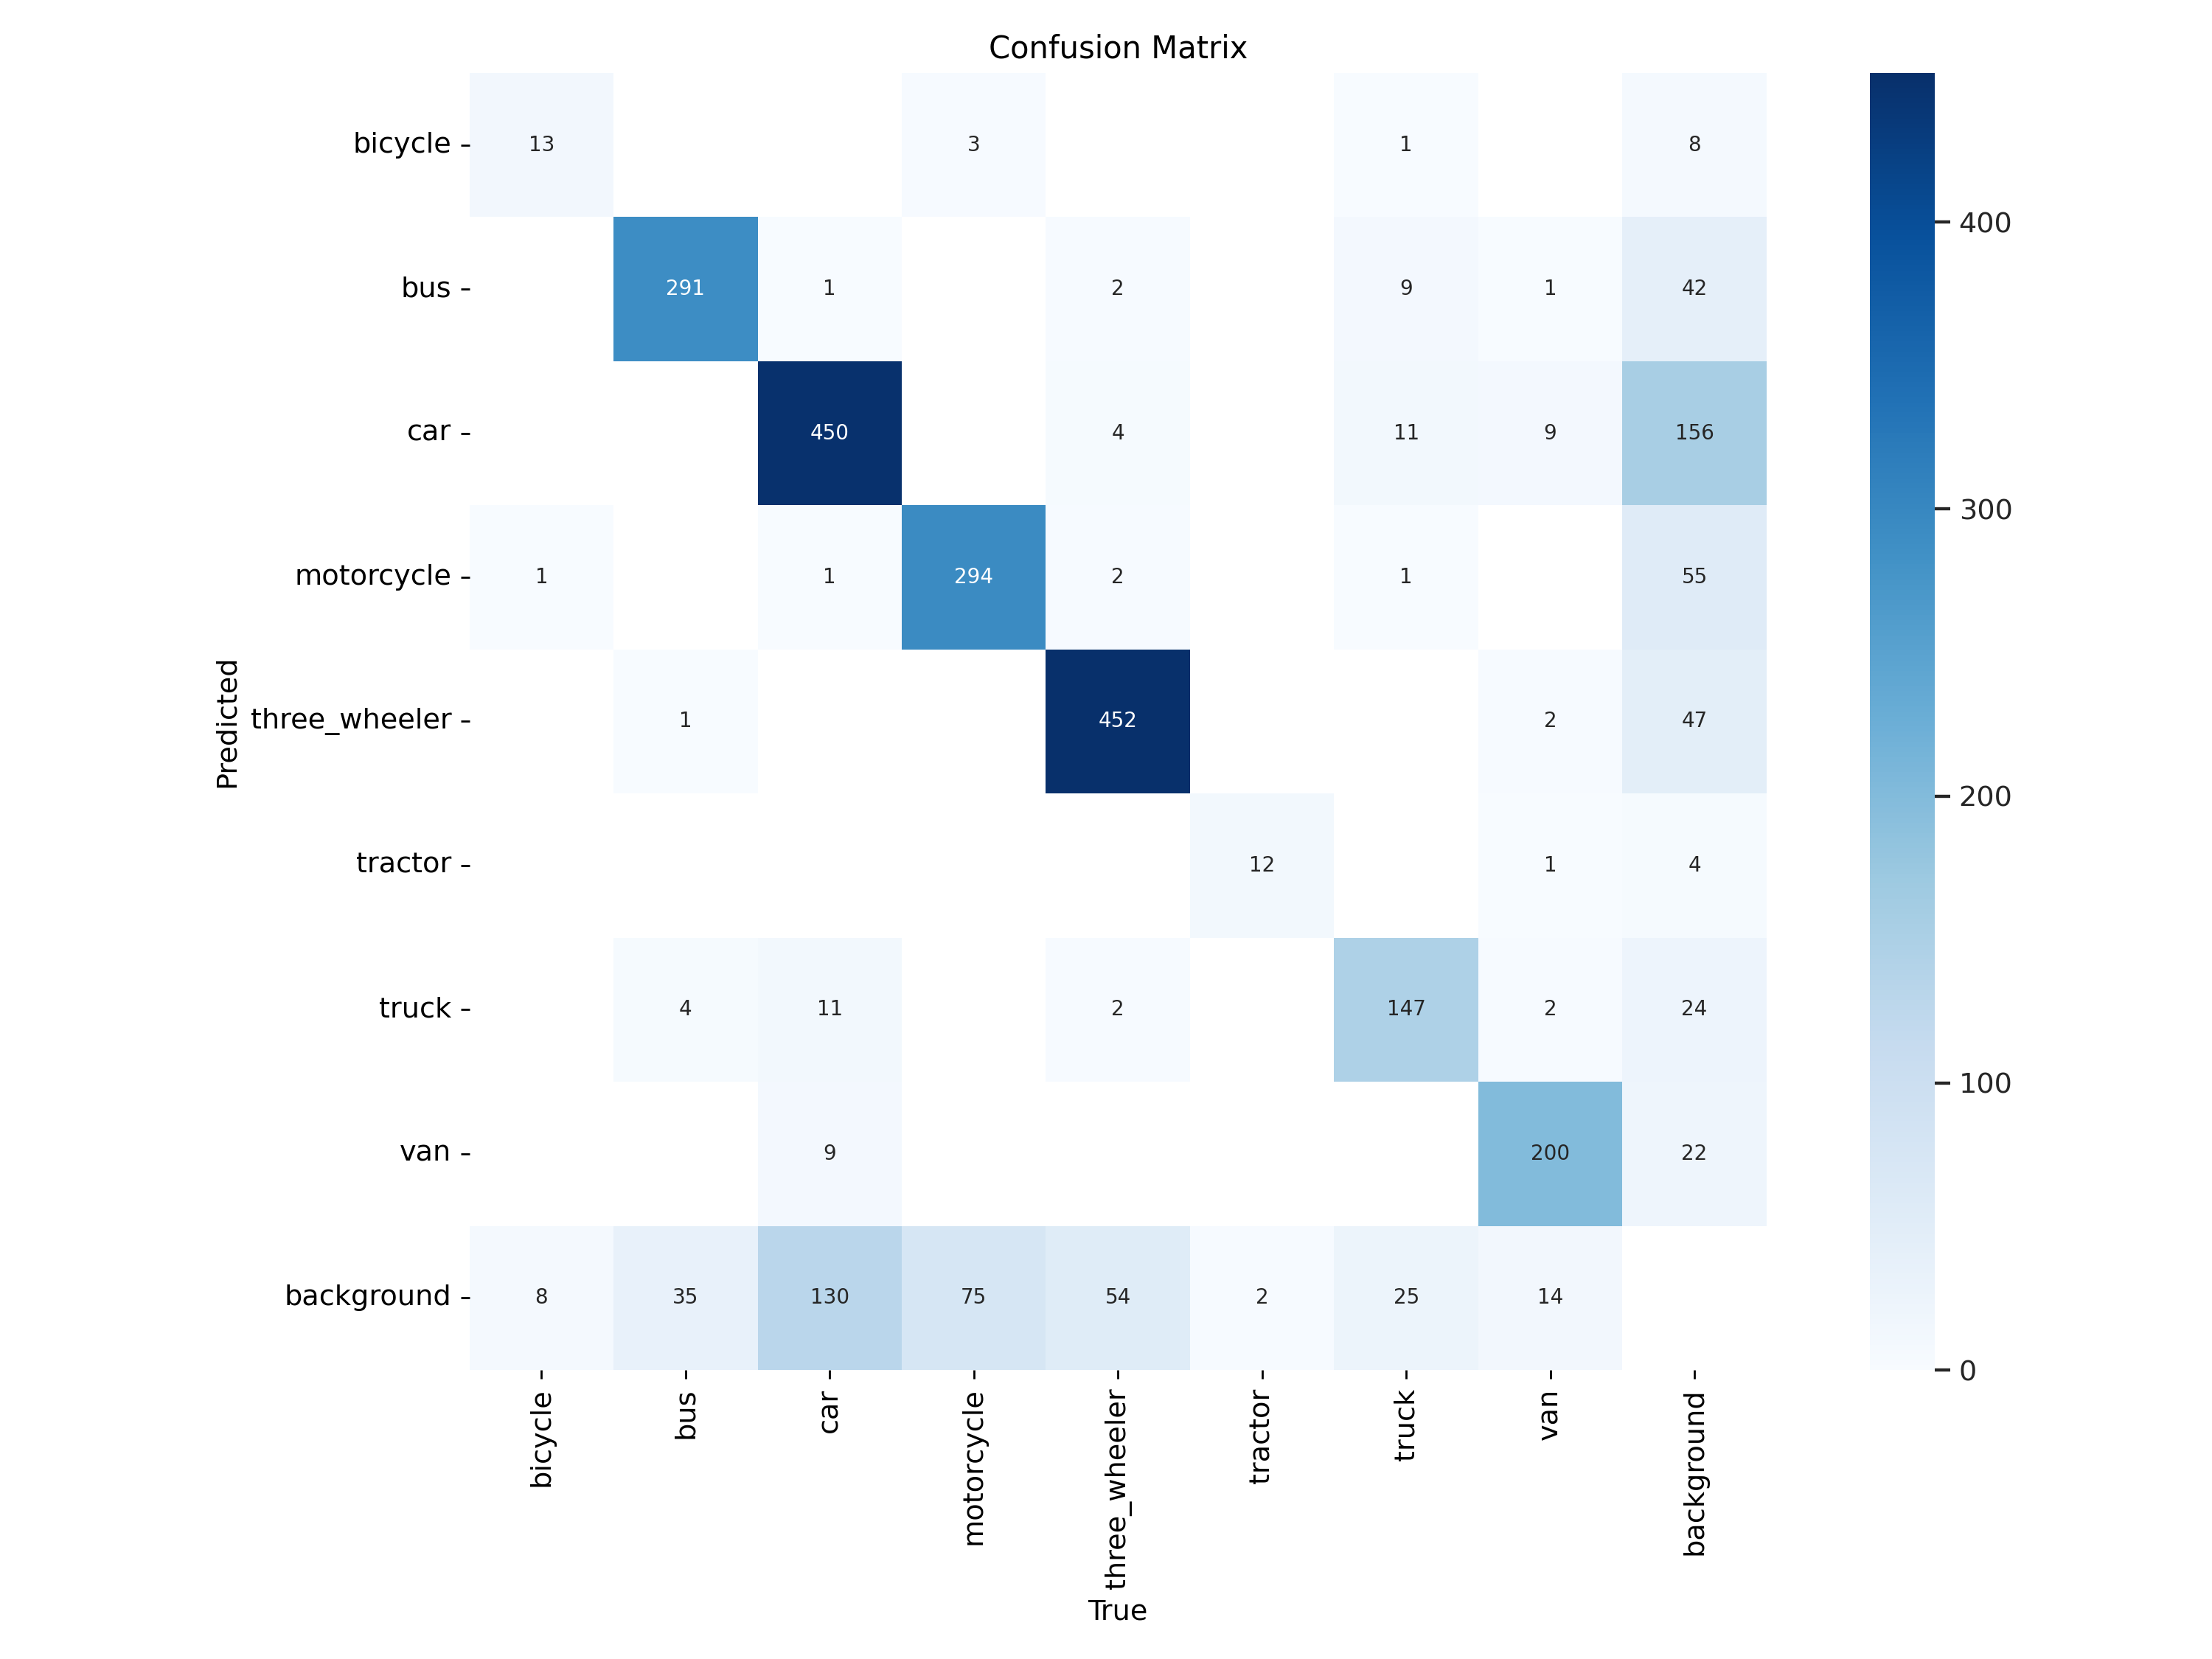

In [14]:
# Confusion matrix
Image(filename='runs/detect/vehicle_detector/confusion_matrix.png', width=700)

## 7. Validate Performance

In [15]:
#Load best model and validate
best_model = YOLO('runs/detect/vehicle_detector/weights/best.pt')
metrics = best_model.val()

print(f"\nmAP@50: {metrics.box.map50:.3f}")
print(f"mAP@50-95: {metrics.box.map:.3f}")
print(f"\nPrecision: {metrics.box.p:.3f}")
print(f"Recall: {metrics.box.r:.3f}")

Ultralytics YOLOv8.0.196 🚀 Python-3.12.12 torch-2.9.0+cu128 CUDA:0 (Tesla T4, 14913MiB)
Model summary (fused): 168 layers, 11128680 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /content/vehicle-dataset/valid/labels.cache... 1124 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1124/1124 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 71/71 [00:18<00:00,  3.93it/s]
                   all       1124       2280      0.876      0.768      0.831       0.64
               bicycle       1124         22      0.681      0.545      0.561      0.287
                   bus       1124        331      0.898      0.852      0.901      0.794
                   car       1124        602      0.849      0.708      0.799      0.613
            motorcycle       1124        372      0.898      0.733      0.833      0.599
         three_wheeler       1124        516      0.961      0.851      0.938      0.746
               


mAP@50: 0.831
mAP@50-95: 0.640


TypeError: unsupported format string passed to numpy.ndarray.__format__

## 8. Test Predictions

In [16]:
# Run predictions on validation set
results = best_model.predict(
    source=f"{DATASET_DIR}/valid/images",
    save=True,
    conf=0.25,
    max_det=50
)

print("Predictions saved to: runs/detect/predict")



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

image 1/1124 /content/vehicle-dataset/valid/images/-10-_jpeg.rf.1f1db28cebb1ff329eae6bb404607162.jpg: 640x640 1 three_wheeler, 16.3ms
image 2/1124 /content/vehicle-dataset/valid/images/-11-_jpeg.rf.e3f8486e026dfbad851a18634b79cc9f.jpg: 640x640 1 three_wheeler, 16.3ms
image 3/1124 /content/vehicle-dataset/valid/images/-12-_jpeg.rf.89d0c789c9886e3e03dd30aeb3334be5.jpg: 640x640 1 three_wheeler, 1 truck, 16.3ms
image 4/1124 /content/vehicle-dataset/valid/i

Predictions saved to: runs/detect/predict


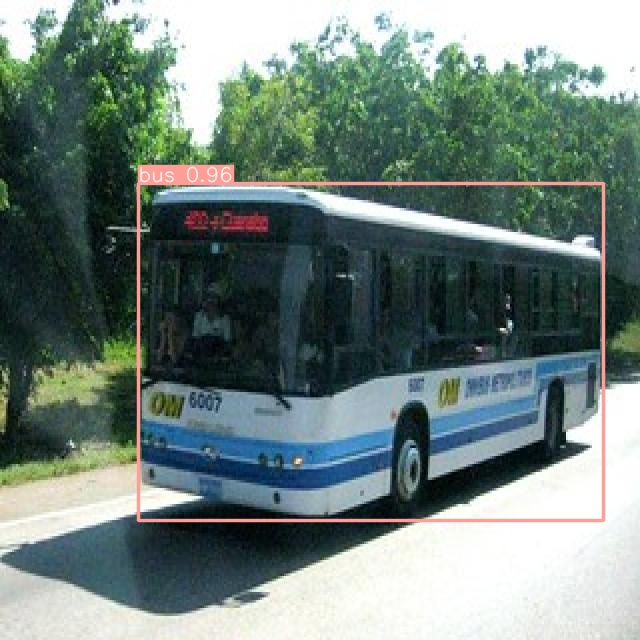

In [17]:
# Display a prediction
import glob
pred_images = glob.glob('runs/detect/predict*/*.jpg')

if pred_images:
    display(Image(filename=pred_images[0], width=700))
else:
    print("No predictions found")

## 9. Download Model

In [18]:
# Download best model for use in Streamlit app
from google.colab import files

model_path = 'runs/detect/vehicle_detector/weights/best.pt'

# Check size
size_mb = os.path.getsize(model_path) / (1024*1024)
print(f"Model size: {size_mb:.1f} MB")

# Download
files.download(model_path)
print("Download started")

Model size: 21.5 MB


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Download started
